In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# %matplotlib inline

In [2]:
df = pd.read_csv('../Datasets/store_sku_ba_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store ID      1000 non-null   object 
 1   SKU ID        1000 non-null   object 
 2   Total Visits  1000 non-null   int64  
 3   Transactions  1000 non-null   int64  
 4   Revenue       1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [4]:
df.head()

Store ID SKU ID  Total Visits  Transactions   Revenue
0  Store_1  SKU_1           606           573  74688.67
1  Store_1  SKU_2           695            27   1390.60
2  Store_1  SKU_3           389           285  50679.63
3  Store_1  SKU_4           689           505  16764.34
4  Store_1  SKU_5           522           230  41928.40

In [5]:
stores = df['Store ID'].unique()
stores

array(['Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6',
       'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11',
       'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16',
       'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21',
       'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26',
       'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31',
       'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36',
       'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41',
       'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Store_46',
       'Store_47', 'Store_48', 'Store_49', 'Store_50'], dtype=object)

In [6]:
products = df['SKU ID'].unique()
products

array(['SKU_1', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6', 'SKU_7',
       'SKU_8', 'SKU_9', 'SKU_10', 'SKU_11', 'SKU_12', 'SKU_13', 'SKU_14',
       'SKU_15', 'SKU_16', 'SKU_17', 'SKU_18', 'SKU_19', 'SKU_20'],
      dtype=object)

In [7]:
print(f"Total Number of Stores = {len(stores)}")
print(f"Total Number of product = {len(products)}")

Total Number of Stores = 50
Total Number of product = 20


# Data Cleaning

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Store ID', 'SKU ID', 'Total Visits', 'Transactions', 'Revenue'], dtype='object')

    INFO: There are total 1000 rows having 50 store and 20 products. There are no duplicate or unfilled value.

# Feature Engineering

In [10]:
# ['Store ID', 'SKU ID', 'Total Visits', 'Transactions', 'Revenue']

#### TASK 1: Calculate the conversion rate at both the store level and the SKU level (i.e., Transactions /Total Visits).

#### Store level conversion rate

In [11]:
df_store_level = df.groupby('Store ID')[['Total Visits', 'Transactions']].sum()

In [12]:
df_store_level

Total Visits  Transactions
Store ID                            
Store_1          11296          6054
Store_10         12173          6311
Store_11          9362          4526
Store_12          8698          3310
Store_13         11846          5155
Store_14         12804          4674
Store_15          8922          3090
Store_16         11857          6122
Store_17         11468          5575
Store_18         10021          5340
Store_19         10678          4627
Store_2          11890          6351
Store_20          9062          3756
Store_21         11478          5562
Store_22          9480          5525
Store_23          9411          3759
Store_24         10295          4313
Store_25          8524          4197
Store_26         10974          5599
Store_27          8856          3943
Store_28         12186          7238
Store_29         10843          5522
Store_3          10214          5201
Store_30         10659          4043
Store_31         12942          6826
Store_32          9157          4085
Store_33         11430          6595
Store_34         10220          5642
Store_35         10257          4359
Store_36         10149          3819
Store_37          9458          5937
Store_38          8975          5518
Store_39          9213          6124
Store_4          11112          5296
Store_40         10295          4891
Store_41         11083          6459
Store_42         11239          5196
Store_43         12664          7616
Store_44          8482          5356
Store_45         11242          5489
Store_46         10322          4997
Store_47          9753          6081
Store_48         11334          5558
Store_49         11032          7129
Store_5          11997          7275
Store_50         11172          5203
Store_6          10668          5665
Store_7           9822          4305
Store_8           8794          5443
Store_9          10245          4208

In [13]:
df_store_level['Conversion Rate'] = df_store_level['Transactions']/df_store_level['Total Visits']

In [14]:
df_store_level

Total Visits  Transactions  Conversion Rate
Store ID                                             
Store_1          11296          6054         0.535942
Store_10         12173          6311         0.518442
Store_11          9362          4526         0.483444
Store_12          8698          3310         0.380547
Store_13         11846          5155         0.435168
Store_14         12804          4674         0.365042
Store_15          8922          3090         0.346335
Store_16         11857          6122         0.516319
Store_17         11468          5575         0.486135
Store_18         10021          5340         0.532881
Store_19         10678          4627         0.433321
Store_2          11890          6351         0.534146
Store_20          9062          3756         0.414478
Store_21         11478          5562         0.484579
Store_22          9480          5525         0.582806
Store_23          9411          3759         0.399426
Store_24         10295          4313         0.418941
Store_25          8524          4197         0.492374
Store_26         10974          5599         0.510206
Store_27          8856          3943         0.445235
Store_28         12186          7238         0.593960
Store_29         10843          5522         0.509269
Store_3          10214          5201         0.509203
Store_30         10659          4043         0.379304
Store_31         12942          6826         0.527430
Store_32          9157          4085         0.446107
Store_33         11430          6595         0.576990
Store_34         10220          5642         0.552055
Store_35         10257          4359         0.424978
Store_36         10149          3819         0.376293
Store_37          9458          5937         0.627723
Store_38          8975          5518         0.614819
Store_39          9213          6124         0.664713
Store_4          11112          5296         0.476602
Store_40         10295          4891         0.475085
Store_41         11083          6459         0.582784
Store_42         11239          5196         0.462319
Store_43         12664          7616         0.601390
Store_44          8482          5356         0.631455
Store_45         11242          5489         0.488258
Store_46         10322          4997         0.484112
Store_47          9753          6081         0.623500
Store_48         11334          5558         0.490383
Store_49         11032          7129         0.646211
Store_5          11997          7275         0.606402
Store_50         11172          5203         0.465718
Store_6          10668          5665         0.531027
Store_7           9822          4305         0.438302
Store_8           8794          5443         0.618945
Store_9          10245          4208         0.410737

In [15]:
df_store_level = df_store_level.reset_index()
pickle.dump(df_store_level, open("../Datasets/processed_data/store_level_transaction.pkl", 'wb'))

#### SKU-Level Conversion Rate

In [16]:
df_sku_level = df.groupby('SKU ID')[['Total Visits', 'Transactions']].sum().reset_index()
df_sku_level['Conversion Rate'] = df_sku_level['Transactions'] / df_sku_level['Total Visits']

In [17]:
df_sku_level

SKU ID  Total Visits  Transactions  Conversion Rate
0    SKU_1         25111         13306         0.529887
1   SKU_10         27641         14333         0.518541
2   SKU_11         27856         16323         0.585978
3   SKU_12         27687         11569         0.417850
4   SKU_13         26734         12703         0.475163
5   SKU_14         24225         12660         0.522601
6   SKU_15         29758         15045         0.505578
7   SKU_16         23574         12906         0.547468
8   SKU_17         25295         11511         0.455070
9   SKU_18         27181         13679         0.503256
10  SKU_19         25834         11440         0.442827
11   SKU_2         27163         13694         0.504142
12  SKU_20         25224         11387         0.451435
13   SKU_3         27772         14055         0.506085
14   SKU_4         24782         13505         0.544952
15   SKU_5         29472         14846         0.503732
16   SKU_6         22764         11478         0.504217
17   SKU_7         26103         14654         0.561391
18   SKU_8         25163         11447         0.454914
19   SKU_9         26715         14324         0.536178

In [18]:
pickle.dump(df_sku_level, open("../Datasets/processed_data/sku_level_transation.pkl", 'wb'))

In [19]:
top_stores = df_store_level.sort_values(by='Conversion Rate', ascending=False).head(10)
bottom_stores = df_store_level.sort_values(by='Conversion Rate', ascending=True).head(10)

In [20]:
top_stores

Store ID  Total Visits  Transactions  Conversion Rate
32  Store_39          9213          6124         0.664713
43  Store_49         11032          7129         0.646211
38  Store_44          8482          5356         0.631455
30  Store_37          9458          5937         0.627723
41  Store_47          9753          6081         0.623500
48   Store_8          8794          5443         0.618945
31  Store_38          8975          5518         0.614819
44   Store_5         11997          7275         0.606402
37  Store_43         12664          7616         0.601390
20  Store_28         12186          7238         0.593960

In [21]:
bottom_stores

Store ID  Total Visits  Transactions  Conversion Rate
6   Store_15          8922          3090         0.346335
5   Store_14         12804          4674         0.365042
29  Store_36         10149          3819         0.376293
23  Store_30         10659          4043         0.379304
3   Store_12          8698          3310         0.380547
15  Store_23          9411          3759         0.399426
49   Store_9         10245          4208         0.410737
12  Store_20          9062          3756         0.414478
16  Store_24         10295          4313         0.418941
28  Store_35         10257          4359         0.424978

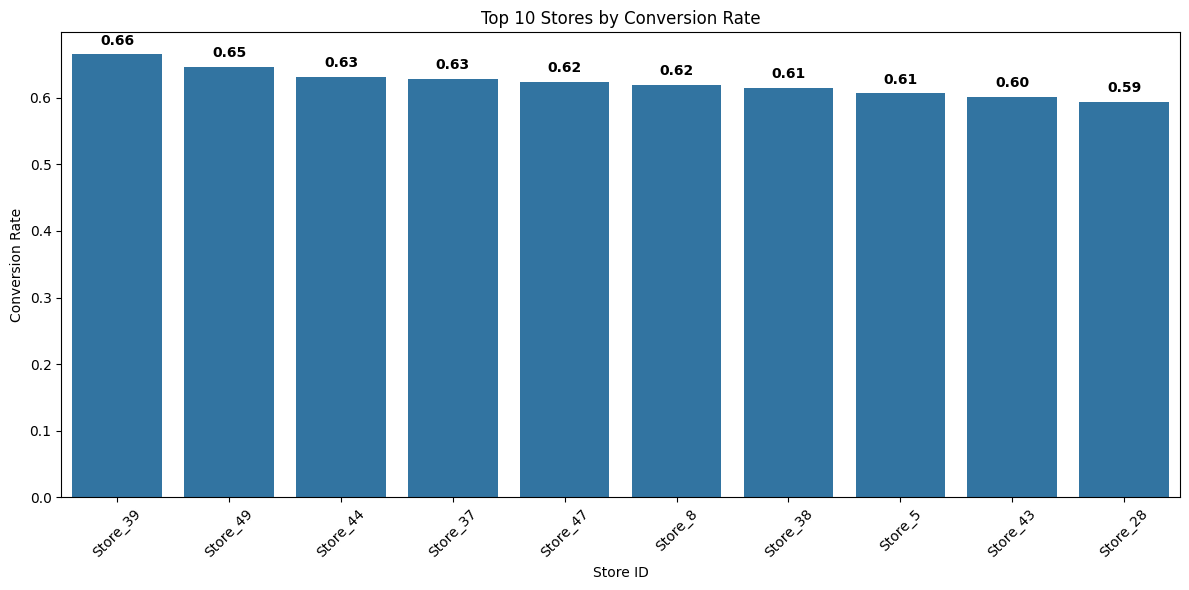

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Store ID', y='Conversion Rate', data=top_stores)

plt.title('Top 10 Stores by Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()

top_stores = top_stores.reset_index()
for i, row in top_stores.iterrows():
    ax.text(
        x=i, 
        y=row['Conversion Rate'] + 0.01,
        s=f"{row['Conversion Rate']:.2f}", 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )
plt.show()

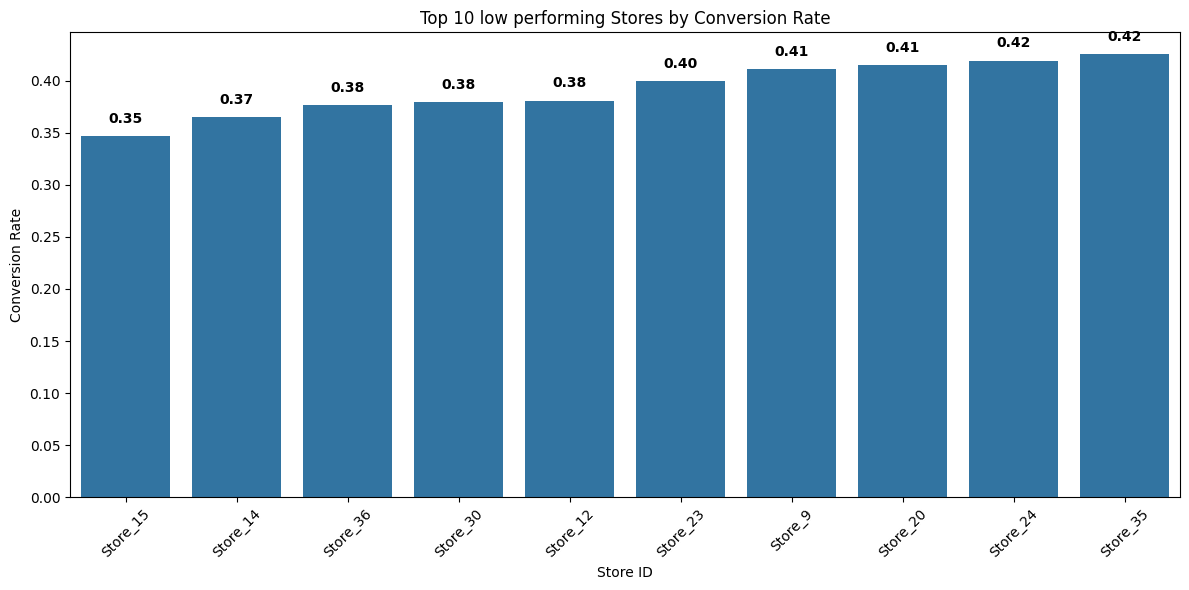

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Store ID', y='Conversion Rate', data=bottom_stores)
plt.title('Top 10 low performing Stores by Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout()
bottom_stores = bottom_stores.reset_index()
for i, row in bottom_stores.iterrows():
    ax.text(
        x=i, 
        y=row['Conversion Rate'] + 0.01,
        s=f"{row['Conversion Rate']:.2f}", 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )
plt.show()

In [24]:
print(f"Least performing stores = {bottom_stores['Store ID'].values}")
print(f"Better performing stores = {top_stores['Store ID'].values}")

Least performing stores = ['Store_15' 'Store_14' 'Store_36' 'Store_30' 'Store_12' 'Store_23'
 'Store_9' 'Store_20' 'Store_24' 'Store_35']
Better performing stores = ['Store_39' 'Store_49' 'Store_44' 'Store_37' 'Store_47' 'Store_8'
 'Store_38' 'Store_5' 'Store_43' 'Store_28']


    Insight Obtained:
    
    ['Store_15' 'Store_14' 'Store_36' 'Store_30' 'Store_12' 'Store_23' 'Store_9' 'Store_20' 'Store_24' 'Store_35'] - These shops needs attaintion to perform well by doing advertisements and providing facilities to the stores

    ['Store_39' 'Store_49' 'Store_44' 'Store_37' 'Store_47' 'Store_8' 'Store_38' 'Store_5' 'Store_43' 'Store_28'] - These are the good performing stores.

#### Top & Bottom Performing SKUs by Conversion

In [25]:
top_skus = df_sku_level.sort_values(by='Conversion Rate', ascending=False).head(10)
bottom_skus = df_sku_level.sort_values(by='Conversion Rate', ascending=True).head(10)

In [26]:
top_skus = top_skus.reset_index(drop=True)
bottom_skus = bottom_skus.reset_index(drop=True)

In [27]:
top_skus

SKU ID  Total Visits  Transactions  Conversion Rate
0  SKU_11         27856         16323         0.585978
1   SKU_7         26103         14654         0.561391
2  SKU_16         23574         12906         0.547468
3   SKU_4         24782         13505         0.544952
4   SKU_9         26715         14324         0.536178
5   SKU_1         25111         13306         0.529887
6  SKU_14         24225         12660         0.522601
7  SKU_10         27641         14333         0.518541
8   SKU_3         27772         14055         0.506085
9  SKU_15         29758         15045         0.505578

In [28]:
bottom_skus

SKU ID  Total Visits  Transactions  Conversion Rate
0  SKU_12         27687         11569         0.417850
1  SKU_19         25834         11440         0.442827
2  SKU_20         25224         11387         0.451435
3   SKU_8         25163         11447         0.454914
4  SKU_17         25295         11511         0.455070
5  SKU_13         26734         12703         0.475163
6  SKU_18         27181         13679         0.503256
7   SKU_5         29472         14846         0.503732
8   SKU_2         27163         13694         0.504142
9   SKU_6         22764         11478         0.504217

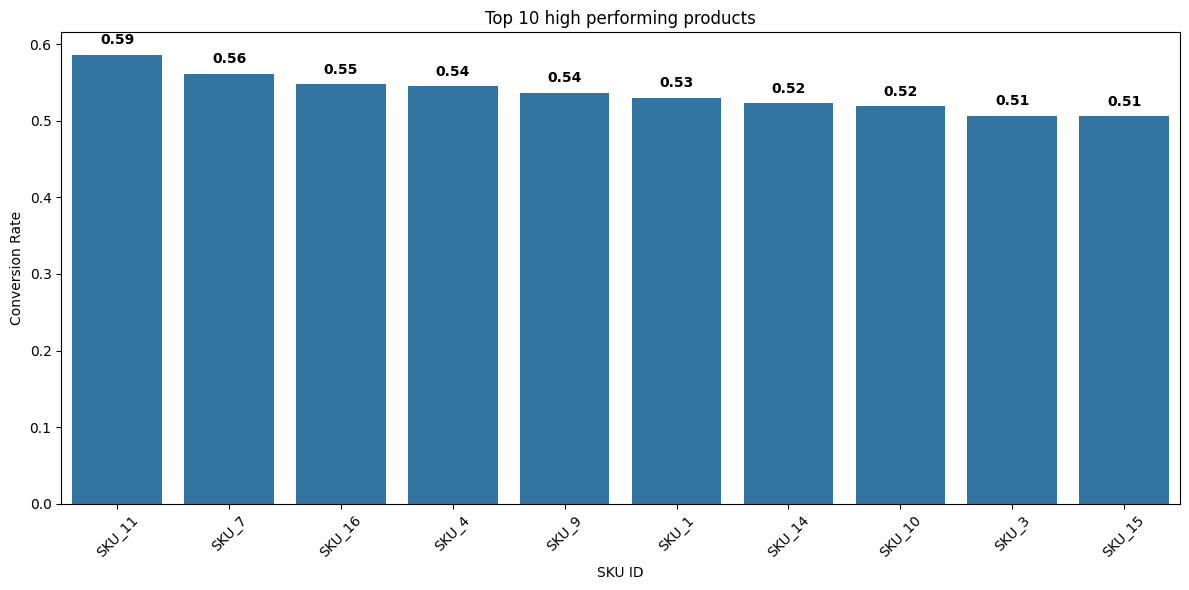

In [29]:
# Plot graph for top performing products

plt.figure(figsize=(12, 6))
sns.barplot(x='SKU ID', y='Conversion Rate', data=top_skus)
plt.title("Top 10 high performing products")
plt.xticks(rotation=45)
plt.tight_layout()
for i, row in top_skus.iterrows():
    plt.text(
        x=i,
        y=row['Conversion Rate'] + 0.01,
        s=f"{row['Conversion Rate']:.2f}",
        ha='center', va='bottom', fontweight='bold', fontsize=10
    )
plt.show()

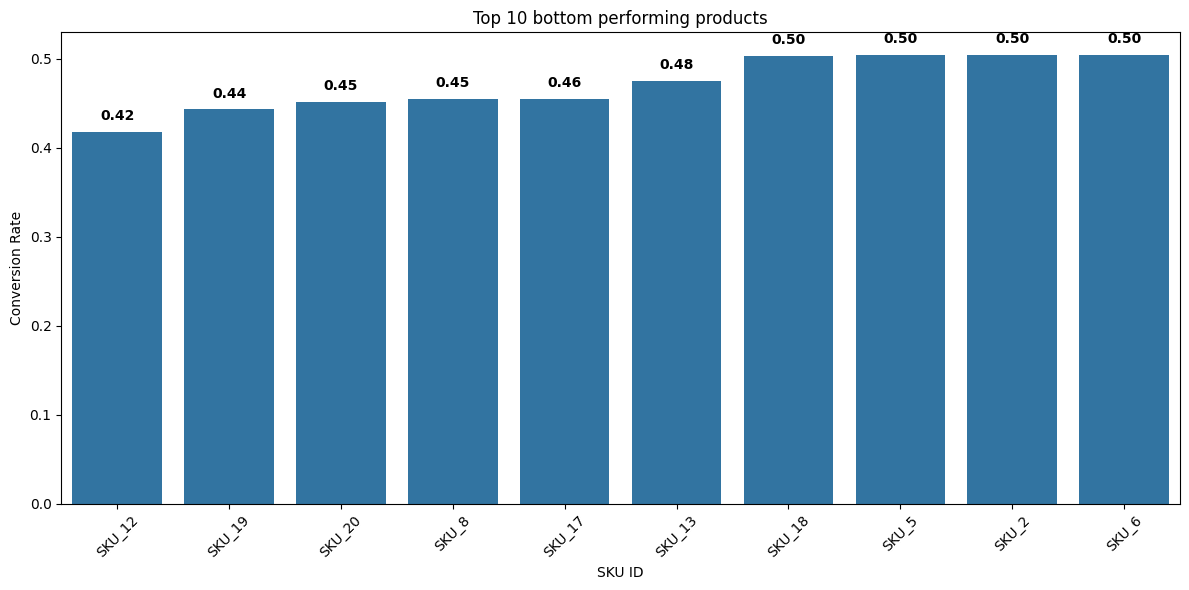

In [30]:
# Plot graph for bottom performing products

plt.figure(figsize=(12, 6))
sns.barplot(x='SKU ID', y='Conversion Rate', data=bottom_skus)
plt.title("Top 10 bottom performing products")
plt.xticks(rotation=45)
plt.tight_layout()
for i, row in bottom_skus.iterrows():
    plt.text(
        x=i,
        y=row['Conversion Rate'] + 0.01,
        s=f"{row['Conversion Rate']:.2f}",
        ha='center', va='bottom', fontweight='bold', fontsize=10
    )
plt.show()

### SKUs with High Views but Low Conversion

In [31]:
df['Conversion Rate'] = df['Transactions'] / df['Total Visits']

In [32]:
df = df.sort_values(by='Conversion Rate', ascending=False).reset_index(drop=True)
df

Store ID  SKU ID  Total Visits  Transactions    Revenue  Conversion Rate
0    Store_21   SKU_2           538           537    9392.72         0.998141
1    Store_28   SKU_1           734           732  117151.27         0.997275
2     Store_2   SKU_3           886           883  173818.90         0.996614
3    Store_37   SKU_5           647           644    7789.79         0.995363
4    Store_15   SKU_2           194           193   21862.08         0.994845
..        ...     ...           ...           ...        ...              ...
995   Store_8  SKU_15           410             0       0.00         0.000000
996  Store_29  SKU_19           846             0       0.00         0.000000
997  Store_10  SKU_10           927             0       0.00         0.000000
998   Store_9   SKU_5           464             0       0.00         0.000000
999  Store_20   SKU_9            66             0       0.00         0.000000

[1000 rows x 6 columns]

In [33]:
df['Conversion Rate'].max()

np.float64(0.9981412639405205)

In [34]:
low_conv_high_vis = df[(df['Conversion Rate'] < 0.2) & (df['Total Visits'] > df['Total Visits'].quantile(0.75))].sort_values(by='Total Visits', ascending=False)
low_conv_high_vis

Store ID  SKU ID  Total Visits  Transactions   Revenue  Conversion Rate
808  Store_15   SKU_4           996           197  37147.92         0.197791
975  Store_41  SKU_10           990            19   1642.40         0.019192
901  Store_31  SKU_14           989           101   2414.63         0.102123
823  Store_21  SKU_13           985           182  15807.11         0.184772
962  Store_19  SKU_10           983            33   3804.70         0.033571
841   Store_4   SKU_2           977           160  11234.43         0.163767
939  Store_17  SKU_17           974            54  10247.14         0.055441
898  Store_45  SKU_19           973           101  19812.03         0.103803
809   Store_7   SKU_2           969           191  22810.30         0.197110
900  Store_36  SKU_15           954            98   2369.61         0.102725
988  Store_27   SKU_9           951             8   1503.04         0.008412
857  Store_11   SKU_6           949           137  25489.08         0.144362
855  Store_14   SKU_1           943           138  25817.42         0.146341
983  Store_45  SKU_16           936            15   2966.99         0.016026
928   Store_7   SKU_7           930            61   6365.14         0.065591
915  Store_25   SKU_5           928            78  12914.40         0.084052
997  Store_10  SKU_10           927             0      0.00         0.000000
831  Store_17  SKU_19           927           161  14113.18         0.173679
930  Store_28   SKU_4           922            58   7746.59         0.062907
904  Store_27   SKU_6           920            89  12548.85         0.096739
955  Store_23  SKU_18           915            39   4582.07         0.042623
948  Store_36   SKU_9           910            42   5364.31         0.046154
843  Store_33   SKU_8           906           145  22571.38         0.160044
940   Store_4  SKU_17           903            50   4923.18         0.055371
949  Store_19   SKU_9           902            41   4901.06         0.045455
838  Store_30   SKU_8           901           150   2354.25         0.166482
990  Store_35  SKU_16           897             6    407.33         0.006689
947   Store_6  SKU_12           891            42   1982.41         0.047138
865  Store_16   SKU_6           889           126   4911.78         0.141732
842  Store_29   SKU_5           887           144  12139.99         0.162345
828  Store_30   SKU_1           886           160  17019.94         0.180587
871  Store_42   SKU_3           874           117  15454.22         0.133867
994  Store_16  SKU_12           874             0      0.00         0.000000
989  Store_18  SKU_10           872             6    781.89         0.006881
976  Store_20  SKU_15           866            16   3048.72         0.018476
856  Store_30   SKU_4           860           125  23855.53         0.145349
825  Store_35  SKU_14           852           157  27759.97         0.184272
887  Store_50  SKU_17           846           104  13813.85         0.122931
996  Store_29  SKU_19           846             0      0.00         0.000000
964  Store_19  SKU_20           843            28   2351.05         0.033215
875  Store_36   SKU_2           831           109  19693.00         0.131167
860  Store_23   SKU_5           830           119  18099.38         0.143373
836  Store_21  SKU_20           830           140  11613.44         0.168675
977  Store_21   SKU_3           827            15   2786.96         0.018138
830   Store_2  SKU_13           813           143  23633.93         0.175892
937  Store_42   SKU_5           801            46   1494.26         0.057428
944  Store_14  SKU_18           798            41   3467.15         0.051378
950   Store_3  SKU_19           794            36   6709.70         0.045340
979  Store_12  SKU_13           788            14    418.95         0.017766
945   Store_9  SKU_11           781            40   2375.62         0.051216
917  Store_40  SKU_17           780            65   5039.00         0.083333
9

    IMPORTANT INSIGHT: These are the stores and SKUs that require immediate attention. Despite being among the top 25% in terms of traffic (i.e., Total Visits), they are converting less than 20% of those visits into transactions. This means they are losing over 75% of potential customers.
    SOLUTION: 
    i) Analyse store location and demand
    ii) Improve product Marketing. i.e. improve product labelling, visibility and description.
    iii) Stratified Sampling and Quota Sampling - Take few individual from every region where the store is located and perform advertising compaigns and analysis
    "Customer aa rha, high demand h pr product nhi bik rha"

In [35]:
pickle.dump(low_conv_high_vis, open("../Datasets/processed_data/list of low conversion high visit.pkl", 'wb'))

### SKUs with Low Views but High Conversion Rate

In [36]:
low_vis_high_conv = df[(df['Conversion Rate'] > 0.8) & (df['Total Visits'] < df['Total Visits'].quantile(0.2))].sort_values(by='Conversion Rate', ascending=False)

In [37]:
low_vis_high_conv

Store ID  SKU ID  Total Visits  Transactions   Revenue  Conversion Rate
4    Store_15   SKU_2           194           193  21862.08         0.994845
7    Store_36   SKU_7           141           140  26309.55         0.992908
12    Store_3  SKU_17           221           219  21744.39         0.990950
13   Store_39   SKU_3           218           216  23923.60         0.990826
14   Store_47   SKU_3           192           190   4373.05         0.989583
18   Store_27  SKU_14           133           131  16181.17         0.984962
28   Store_44   SKU_7           147           143  12617.67         0.972789
30   Store_25  SKU_11           179           174  24237.31         0.972067
32   Store_18   SKU_4           103           100   4392.35         0.970874
36   Store_47  SKU_18           122           118  13122.59         0.967213
41   Store_16  SKU_15           186           179  28582.73         0.962366
50   Store_37   SKU_1           173           165  15007.71         0.953757
52    Store_6  SKU_15            84            80  10766.98         0.952381
58   Store_38   SKU_7           222           210   6317.17         0.945946
65    Store_7  SKU_14           148           139  10070.03         0.939189
76   Store_12  SKU_16           135           125   4094.35         0.925926
78   Store_36  SKU_16           205           189  11420.06         0.921951
87   Store_18   SKU_9           231           212  18489.48         0.917749
88   Store_12  SKU_19           158           145   3844.65         0.917722
100   Store_9   SKU_1           129           117  21724.82         0.906977
107   Store_9  SKU_20           195           176  14358.15         0.902564
116  Store_26  SKU_17           151           135  19927.92         0.894040
117  Store_37   SKU_2           112           100  17845.48         0.892857
122   Store_4   SKU_8           153           136  19512.19         0.888889
123  Store_41   SKU_1            63            56  10753.90         0.888889
127  Store_12   SKU_2            96            85   2170.41         0.885417
129  Store_21  SKU_12           147           130  18498.33         0.884354
131  Store_32  SKU_18           133           117  19087.21         0.879699
144  Store_39  SKU_10           232           200  16142.35         0.862069
145   Store_1  SKU_16           130           112  21902.37         0.861538
157  Store_22   SKU_6            52            44   3404.64         0.846154
160  Store_29   SKU_6            77            65  11246.13         0.844156
174  Store_18  SKU_16           168           139  23327.59         0.827381
176  Store_47  SKU_15           132           109  19952.05         0.825758
177  Store_35   SKU_8           229           189  17949.04         0.825328
181  Store_42   SKU_7           124           102  12102.88         0.822581
186  Store_40   SKU_6            93            76   6729.73         0.817204
191  Store_11  SKU_12           144           117  16679.15         0.812500
198  Store_11  SKU_10            92            74   1806.64         0.804348

    These are the stores where the given product has low visit but high convertion rate. "Saman aksar bik jata h."

In [38]:
pickle.dump(low_vis_high_conv, open("../Datasets/processed_data/list of low visit high conversion.pkl", 'wb'))

## Working on Revenue

### List of most selling product with total revenue in each store

In [39]:
df.columns

Index(['Store ID', 'SKU ID', 'Total Visits', 'Transactions', 'Revenue',
       'Conversion Rate'],
      dtype='object')

In [40]:
stores_revenues = df.groupby('Store ID')[['Revenue']].sum()

In [41]:
stores_revenues.rename(columns = {'Revenue': "Total Revenue"}, inplace=True)
stores_revenues

Total Revenue
Store ID               
Store_1       587542.10
Store_10      802605.29
Store_11      428488.02
Store_12      313714.85
Store_13      564842.31
Store_14      421539.55
Store_15      362021.48
Store_16      590286.53
Store_17      409284.05
Store_18      605131.34
Store_19      499675.35
Store_2       762620.26
Store_20      406859.50
Store_21      535694.38
Store_22      561177.72
Store_23      419320.67
Store_24      393599.89
Store_25      460440.63
Store_26      572546.72
Store_27      501106.44
Store_28     1057732.38
Store_29      663533.18
Store_3       528964.69
Store_30      388411.83
Store_31      748926.10
Store_32      438905.49
Store_33      806192.61
Store_34      751553.57
Store_35      478791.75
Store_36      431669.84
Store_37      404139.26
Store_38      509927.46
Store_39      667804.09
Store_4       627270.33
Store_40      573784.33
Store_41      594191.64
Store_42      544943.93
Store_43      786369.76
Store_44      467371.06
Store_45      579291.35
Store_46      459232.24
Store_47      521435.76
Store_48      550802.61
Store_49      793523.76
Store_5       713837.60
Store_50      491489.52
Store_6       797079.88
Store_7       477403.31
Store_8       547882.53
Store_9       282296.99

In [42]:
best_selling_product = df.sort_values(by=['Store ID', 'Conversion Rate'], ascending=[True, False])

In [43]:
best_selling_product = best_selling_product.drop_duplicates(subset='Store ID', keep='first')
best_selling_product = best_selling_product[['Store ID', 'SKU ID', 'Revenue', 'Conversion Rate']]
best_selling_product

Store ID  SKU ID    Revenue  Conversion Rate
60    Store_1   SKU_1   74688.67         0.945545
21   Store_10   SKU_8  122231.73         0.982094
80   Store_11   SKU_2   66014.88         0.921488
76   Store_12  SKU_16    4094.35         0.925926
69   Store_13   SKU_7   88402.49         0.932971
56   Store_14  SKU_19   30553.45         0.947826
4    Store_15   SKU_2   21862.08         0.994845
6    Store_16  SKU_10   44570.41         0.993888
67   Store_17   SKU_4    8304.48         0.935302
32   Store_18   SKU_4    4392.35         0.970874
24   Store_19   SKU_4   16519.62         0.979021
2     Store_2   SKU_3  173818.90         0.996614
202  Store_20  SKU_18  101783.10         0.800000
0    Store_21   SKU_2    9392.72         0.998141
26   Store_22   SKU_9   88903.70         0.975952
199  Store_23  SKU_15   12839.44         0.803256
236  Store_24   SKU_9   62574.30         0.766623
30   Store_25  SKU_11   24237.31         0.972067
42   Store_26  SKU_10   21200.71         0.961732
18   Store_27  SKU_14   16181.17         0.984962
1    Store_28   SKU_1  117151.27         0.997275
77   Store_29  SKU_20   42735.47         0.923077
12    Store_3  SKU_17   21744.39         0.990950
43   Store_30  SKU_15    6090.91         0.960084
74   Store_31   SKU_4   38131.95         0.927445
11   Store_32   SKU_1   66414.80         0.991128
22   Store_33   SKU_1  151897.27         0.979701
31   Store_34  SKU_18   23871.87         0.972028
142  Store_35  SKU_10   42291.34         0.865385
7    Store_36   SKU_7   26309.55         0.992908
3    Store_37   SKU_5    7789.79         0.995363
9    Store_38   SKU_6   91314.94         0.992723
13   Store_39   SKU_3   23923.60         0.990826
85    Store_4  SKU_20  113246.29         0.919028
29   Store_40   SKU_5   19236.97         0.972656
27   Store_41  SKU_13   74112.97         0.974499
68   Store_42  SKU_10   75693.65         0.934132
47   Store_43  SKU_13  115133.55         0.955176
15   Store_44   SKU_8   77042.53         0.988338
19   Store_45   SKU_7  170137.95         0.982292
63   Store_46   SKU_8   75535.57         0.939276
8    Store_47  SKU_11   48279.84         0.992727
25   Store_48  SKU_16   31389.17         0.977143
133  Store_49  SKU_19   16700.27         0.877076
17    Store_5  SKU_13   81262.50         0.985222
34   Store_50  SKU_18  104198.81         0.970046
38    Store_6   SKU_9   81949.48         0.966339
54    Store_7   SKU_6   71302.12         0.951965
23    Store_8   SKU_3   77706.36         0.979638
100   Store_9   SKU_1   21724.82         0.906977

In [44]:
stores_revenues = pd.merge(stores_revenues, best_selling_product, on='Store ID')

In [45]:
stores_revenues.rename(columns={'SKU ID':'Best Selling Product', "Conversion Rate":"Product Conversion Rate"}, inplace=True)

In [46]:
stores_revenues

Store ID  Total Revenue Best Selling Product    Revenue  \
0    Store_1      587542.10                SKU_1   74688.67   
1   Store_10      802605.29                SKU_8  122231.73   
2   Store_11      428488.02                SKU_2   66014.88   
3   Store_12      313714.85               SKU_16    4094.35   
4   Store_13      564842.31                SKU_7   88402.49   
5   Store_14      421539.55               SKU_19   30553.45   
6   Store_15      362021.48                SKU_2   21862.08   
7   Store_16      590286.53               SKU_10   44570.41   
8   Store_17      409284.05                SKU_4    8304.48   
9   Store_18      605131.34                SKU_4    4392.35   
10  Store_19      499675.35                SKU_4   16519.62   
11   Store_2      762620.26                SKU_3  173818.90   
12  Store_20      406859.50               SKU_18  101783.10   
13  Store_21      535694.38                SKU_2    9392.72   
14  Store_22      561177.72                SKU_9   88903.70   
15  Store_23      419320.67               SKU_15   12839.44   
16  Store_24      393599.89                SKU_9   62574.30   
17  Store_25      460440.63               SKU_11   24237.31   
18  Store_26      572546.72               SKU_10   21200.71   
19  Store_27      501106.44               SKU_14   16181.17   
20  Store_28     1057732.38                SKU_1  117151.27   
21  Store_29      663533.18               SKU_20   42735.47   
22   Store_3      528964.69               SKU_17   21744.39   
23  Store_30      388411.83               SKU_15    6090.91   
24  Store_31      748926.10                SKU_4   38131.95   
25  Store_32      438905.49                SKU_1   66414.80   
26  Store_33      806192.61                SKU_1  151897.27   
27  Store_34      751553.57               SKU_18   23871.87   
28  Store_35      478791.75               SKU_10   42291.34   
29  Store_36      431669.84                SKU_7   26309.55   
30  Store_37      404139.26                SKU_5    7789.79   
31  Store_38      509927.46                SKU_6   91314.94   
32  Store_39      667804.09                SKU_3   23923.60   
33   Store_4      627270.33               SKU_20  113246.29   
34  Store_40      573784.33                SKU_5   19236.97   
35  Store_41      594191.64               SKU_13   74112.97   
36  Store_42      544943.93               SKU_10   75693.65   
37  Store_43      786369.76               SKU_13  115133.55   
38  Store_44      467371.06                SKU_8   77042.53   
39  Store_45      579291.35                SKU_7  170137.95   
40  Store_46      459232.24                SKU_8   75535.57   
41  Store_47      521435.76               SKU_11   48279.84   
42  Store_48      550802.61               SKU_16   31389.17   
43  Store_49      793523.76               SKU_19   16700.27   
44   Store_5      713837.60               SKU_13   81262.50   
45  Store_50      491489.52               SKU_18  104198.81   
46   Store_6      797079.88                SKU_9   81949.48   
47   Store_7      477403.31                SKU_6   71302.12   
48   Store_8      547882.53                SKU_3   77706.36   
49   Store_9      282296.99                SKU_1   21724.82   

    Product Conversion Rate  
0                  0.945545  
1                  0.982094  
2                  0.921488  
3                  0.925926  
4                  0.932971  
5                  0.947826  
6                  0.994845  
7                  0.993888  
8                  0.935302  
9                  0.970874  
10                 0.979021  
11                 0.996614  
12                 0.800000  
13                 0.998141  
14                 0.975952  
15                 0.803256  
16                 0.766623  
17                 0.972067  
18                 0.961732  
19                 0.984962  
20                 0.997275  
21                 0.923077  
22                 0.990950  
23                 0.960084  
24                 0.927445  
25        

In [47]:
pickle.dump(stores_revenues, open("../Datasets/processed_data/list of total revenue each store.pkl", 'wb'))

### List of low revenue product with store and conversion rate

### High Revenue but Low Conversion Rate SKUs

### Low Revenue but High Conversion Rate

### Consistently Low-Converting SKUs Across Stores - poorly performing products overall

### Consistently low-performing stores